In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate(m, switch):
    """
    Args:
        m: the number of experiments to conduct (i.e., how much rounds one wants to play)
        switch: if True, then the door is switched after the initial choice
        
    Returns:
        - the probability of winning, given that the player changed or did not change the door.
    """    
    wins = 0
    
    for i in range(m): 
        # Initialize the doors and their indices
        doors = ['car', 'goat', 'goat']
        door_indices = {0, 1, 2}
        
        # Shuffle the doors
        # random.shuffle(doors)
        # It turns out that shuffling the doors is actually not necessary,
        # as the initial choice of the door is randomized
        
        # Initial choice of the door (randomized)
        init_ind = random.choice([0, 1, 2])
        init_choice = doors[init_ind]

        # Show one goat that is NOT the player's initial choice
        possible_reveals = [i for i, door in enumerate(doors) if door == 'goat' and i != init_ind]
        revealed_door_ind = random.choice(possible_reveals)
        
        # Remove the indices of the initially chosen door and the revealed door from
        # the set of all the door indices --> we are left with only one index,
        # which is the index of the door that the player is given if they decide to switch
        # the door from their initial choice
        new_door_ind = door_indices - {init_ind, revealed_door_ind}

        # Here the player has the option to change the door from the initial choice
        if switch:
            new_choice = doors[next(iter(new_door_ind))]
            # Check if the player won
            if new_choice == 'car':
                wins += 1
        else:
            if init_choice == 'car':
                wins += 1
    
    return wins / m

In [3]:
# No switch
simulate(m=1000000, switch=False)

0.333192

In [4]:
# Switch
simulate(m=1000000, switch=True)

0.666361

In [5]:
def visualize_simulation(m):
    
    probas_switch = np.zeros(m)
    probas_no_switch = np.zeros(m)
    for i in range(1, m+1):
        probas_switch[i-1] = simulate(m=i, switch=True)
        probas_no_switch[i-1] = simulate(m=i, switch=False)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14,8))
    ax[0].plot(np.arange(m), probas_switch, linewidth=0.8, zorder=2)
    ax[0].grid(True, alpha=0.3, zorder=3)
    ax[0].axhline(y=2/3, color='red', linestyle='dashed', zorder=3)
    ax[0].set_xlabel('The number of experiments', size=14)
    ax[0].set_ylabel('Probability of winning', size=14)
    ax[0].set_title('Probability of winning when switching', size=14)
    
    ax[1].plot(np.arange(m), probas_no_switch, color='black', linewidth=0.8, zorder=2)
    ax[1].grid(True, alpha=0.3, zorder=1)
    ax[1].axhline(y=1/3, color='red', linestyle='dashed', zorder=3)
    ax[1].set_title('Probability of winning when NOT switching', size=14)
    plt.tight_layout();

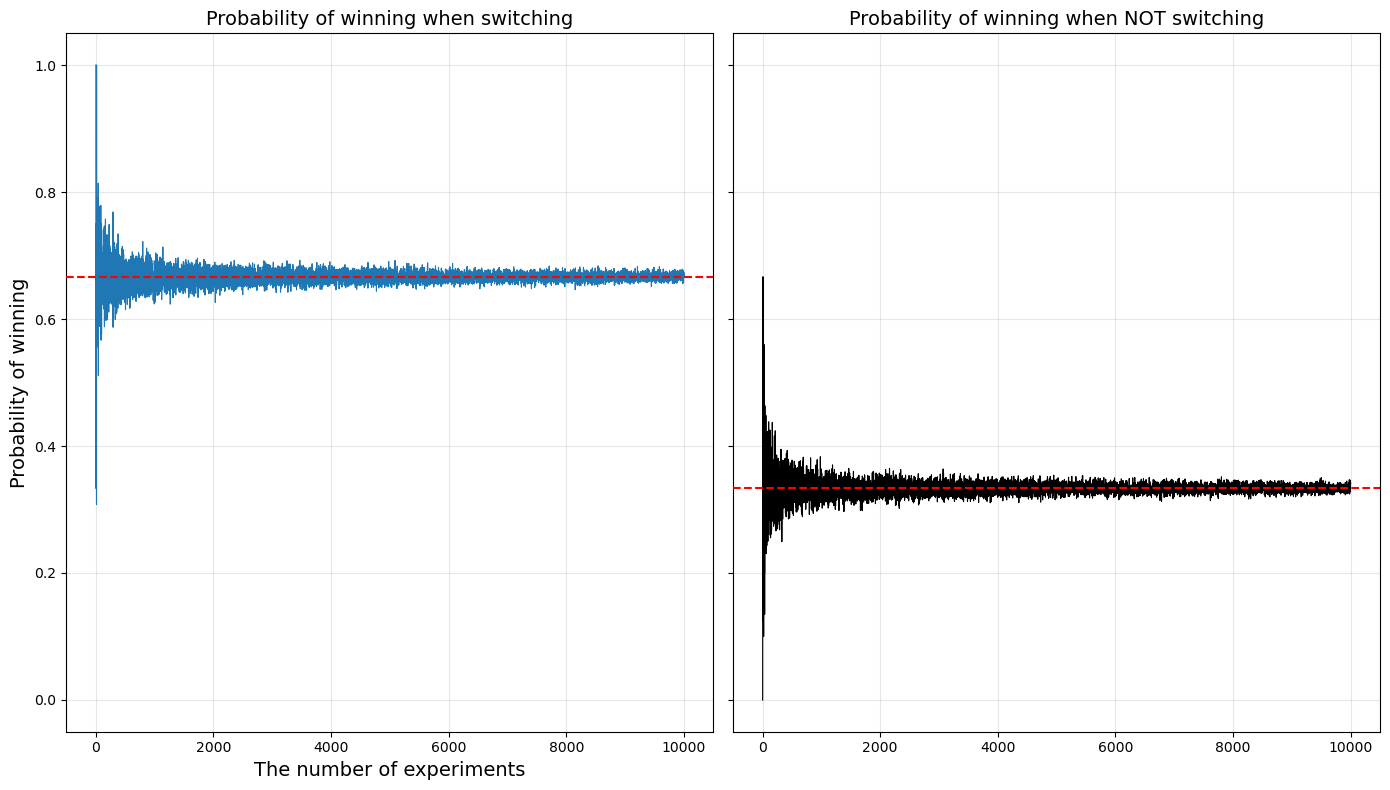

In [6]:
visualize_simulation(m=10000)

- In the left-hand side (the Monty Hall experiment with **switching**) we can see that as the number of experiments $\, m \,$ grows, the probability of winning approaches $\, \frac{2}{3}. \,$
- In the right-hand side (the Monty Hall experiment with **NO switching**) we can see that as the number of experiments $\, m \,$ grows, the probability of winning approaches $\, \frac{1}{3}. \,$

This simulation experiment shows that one indeed should switch the door after the initial choice in the Monty Hall problem.